# Aerial Cactus Challenge

In this kaggle challenge we have to identify if an image contains cactus or not. We will use open cv, CNN, keras to build our model and then train the model on training images.
Finally we will make predictions using the model on test images.

In [1]:
#making the imports

import pandas as pd
import numpy as np

import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPool2D, Activation, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [2]:
#define the directory

train_directory="../input/train/train"
test_directory="../input/test/test"
train=pd.read_csv('../input/train.csv')

In [3]:
#checking the head
train.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


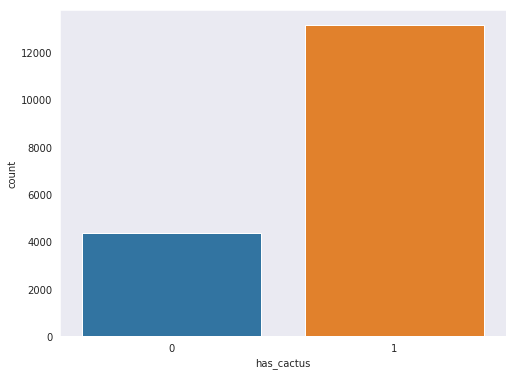

In [4]:
plt.figure(figsize = (8,6))
sns.set_style('dark')
sns.countplot(train['has_cactus'])
plt.show()

So we can see that most of the images in training set have cactus in them. 

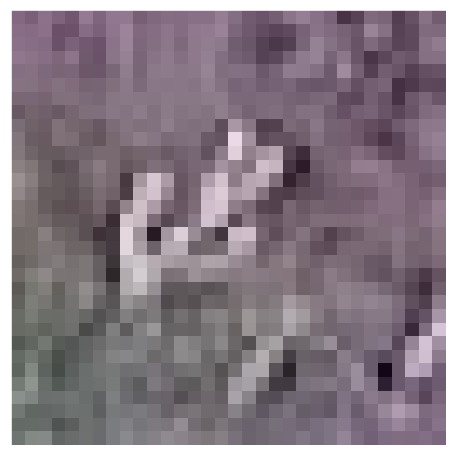

In [5]:
#lets display a random image from the training set

img = cv2.imread('../input/train/train/0148bb4a295cf49c0169d69a4a63df7e.jpg')
plt.figure(figsize = (10,8))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

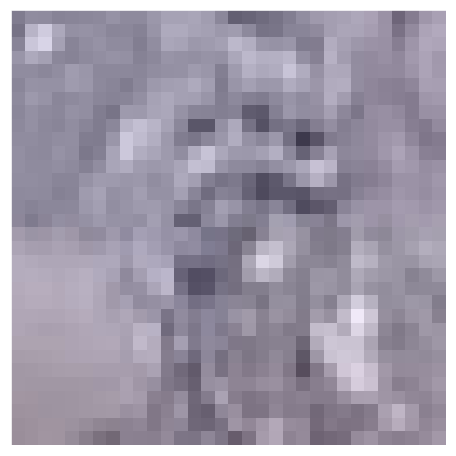

In [6]:
#lets display a random image from the training set

img = cv2.imread('../input/train/train/0de4702853bd3667fb24db3a8dcc07bd.jpg')
plt.figure(figsize = (10,8))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

The images are low resolution, normally with human eye we will not be able to tell if there is a cactus or not in the image. But let's trust the judement of neural nets to perform this task for us. :-)

In [7]:
#lets check the shape of image
img.shape

(32, 32, 3)

These are 32 by 32 pixel images (so quite low resolution). Number 3 indicates that these are color images, 1 would denote greyscale image.

## Data Augmentation

Performing Data Augmentation will be done by keras ImageDataGenerator, This is a form of regularization and our model will generalize better.
We will rescale so that all values range between 0 and 1. Setting aside 20% data for validation set. Shear range will displace each point in fixed direction. Horizontal flip will randomly flip the image in horizontal direction. 

In [8]:
#define the parameters for ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./255, validation_split= 0.2, shear_range= 0.2, 
                                  zoom_range= 0.2, horizontal_flip= True)

In [9]:
#converting the has_cactus to a string
train['has_cactus'] = train['has_cactus'].astype(str)

In [10]:
#lets use data generator to make training and validation set.

train_generator = train_datagen.flow_from_dataframe(train, 
                                                    directory= train_directory, 
                                                    subset= 'training',
                                                    x_col= 'id',
                                                    y_col= 'has_cactus',
                                                    target_size= (32,32),
                                                    class_mode= 'binary'
                                                   )


test_generator = train_datagen.flow_from_dataframe(train,
                                                  directory= train_directory,
                                                  subset= 'validation',
                                                  x_col= 'id',
                                                  y_col= 'has_cactus',
                                                  target_size= (32,32),
                                                  class_mode= 'binary'
                                                  )

Found 14000 validated image filenames belonging to 2 classes.
Found 3500 validated image filenames belonging to 2 classes.


So now we have 14k images for training set and 3.5k images for validation set.

## Creating the model

We will build our CNN model and will use a drop out of 30 % to prevent overfitting. 

In [11]:
#define the model layers
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))


In [12]:
#lets compile the model

model.compile(loss = 'binary_crossentropy',
             optimizer= Adam(),
             metrics= ['accuracy'])

In [13]:
#model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
__________

## Train the Model
lets do it for 20 epochs for demo. Although this could result in overfitting :-)

In [14]:
#lets train the model for 20 epochs

history = model.fit_generator(train_generator,
                             steps_per_epoch= 2000, 
                             epochs= 20, 
                             validation_data= test_generator,
                             validation_steps= 64)

Epoch 1/20
2000/2000 [==============================] - 113s 56ms/step - loss: 0.1344 - acc: 0.9471 - val_loss: 0.0689 - val_acc: 0.9756
Epoch 2/20
2000/2000 [==============================] - 96s 48ms/step - loss: 0.0611 - acc: 0.9779 - val_loss: 0.1075 - val_acc: 0.9620
Epoch 3/20
2000/2000 [==============================] - 93s 46ms/step - loss: 0.0470 - acc: 0.9835 - val_loss: 0.0514 - val_acc: 0.9824
Epoch 4/20
2000/2000 [==============================] - 93s 47ms/step - loss: 0.0376 - acc: 0.9864 - val_loss: 0.0590 - val_acc: 0.9763
Epoch 5/20
2000/2000 [==============================] - 94s 47ms/step - loss: 0.0330 - acc: 0.9882 - val_loss: 0.0853 - val_acc: 0.9707
Epoch 6/20
 600/2000 [========>.....................] - ETA: 1:03 - loss: 0.0288 - acc: 0.9892

In [15]:
#convert the results to a data frame
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,val_loss,val_acc,loss,acc,epoch
0,0.068879,0.975586,0.134466,0.947010,0
1,0.107450,0.962032,0.061078,0.977941,1
2,0.051354,0.982422,0.046964,0.983577,2
3,0.058973,0.976331,0.037688,0.986342,3
4,0.085329,0.970703,0.033038,0.988238,4
5,0.030365,0.989645,0.027114,0.990081,5
6,0.042315,0.989645,0.027903,0.989630,6
7,0.036679,0.987793,0.021032,0.992850,7
8,0.036517,0.988166,0.020593,0.992365,8
9,0.029294,0.992676,0.019983,0.992993,9


## Plot the Training and Validation Accuracy/Loss

See how model tries to overfit after certain epochs. 

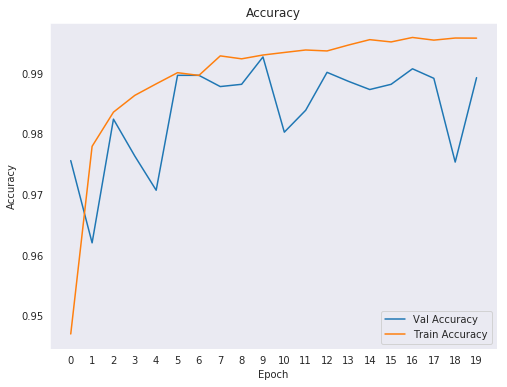

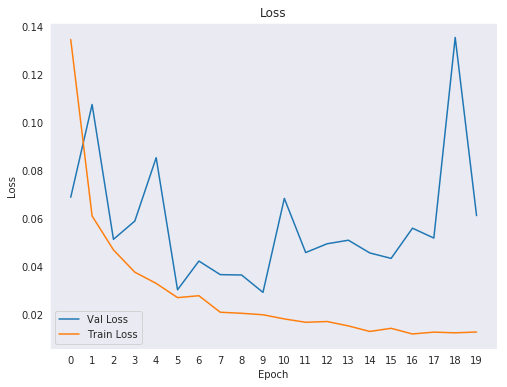

In [16]:
#plotting the results to see difference between train and validation accuracy/loss

plt.figure(figsize = (8,6))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(hist['epoch'],hist['val_acc'], label = 'Val Accuracy')
plt.plot(hist['epoch'],hist['acc'], label = 'Train Accuracy')
plt.xticks(range(0,20))
plt.legend(loc = 'lower right')
plt.title('Accuracy')
plt.show()

plt.figure(figsize = (8,6))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(hist['epoch'],hist['val_loss'], label = 'Val Loss')
plt.plot(hist['epoch'],hist['loss'], label = 'Train Loss')
plt.xticks(range(0,20))
plt.legend()
plt.title('Loss')
plt.show()

As we can see that after epoch#4 the model starts to overfit. So we may have stopped the training at epoch 4. 

In [17]:
#getting the test set ready to make predictions

ids = []
X_test = []

for image in os.listdir(test_directory):
    
    ids.append(image.split('.')[0])
    path = os.path.join(test_directory, image)
    X_test.append(cv2.imread(path))
    
X_test = np.array(X_test)
X_test = X_test.astype('float32')/ 255

## Lets make the predictions

In [18]:
#making the predictions
predictions = model.predict(X_test)

In [19]:
#writing to submission file

my_sub = pd.read_csv('../input/sample_submission.csv')
my_sub['id'] = ids
my_sub['has_cactus'] = predictions

In [20]:
#convert the probability to 0s and ones. 
def cvt_prob(x):
    
    if x >= 0.5:
        return 1
    else:
        return 0
    
my_sub['has_cactus'] = my_sub['has_cactus'].apply(cvt_prob)    

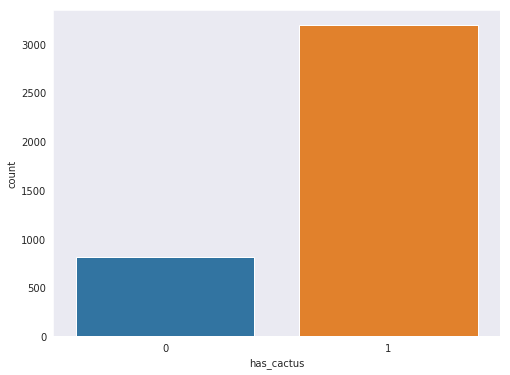

In [21]:
#see the count of 0s and 1s 
plt.figure(figsize = (8,6))
sns.set_style('dark')
sns.countplot(my_sub['has_cactus'])
plt.show()

So as we had more images in training set with cactus in them so is the case with test set as well.

In [22]:
#write to submission file
my_sub.to_csv('my_sub1.csv',index= False)

This is a pretty decent model with good accuracy. In colclusion we can say that;

**Scaling** is necessary to bring all of your features on to a similar scale so that your model should give equal attention to all the features. 
Adding more layers to build a complex model could give good accuracy on training data as model would try to memorize the training data and will not give desired performance on test data **(overfitting)**. 
Train for **less epochs** as more epochs will result in **overfitting**. 
Also use the Dropout to prevent **overfitting**. 

